<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>CREDIT CARD FRAUD DETECTION
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of IRis</strong></h1>
</div>


In [2]:
file_path = (r"/kaggle/input/02-creditcard/02-creditcard.csv")
df =pd.read_csv(file_path)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 284807 and Number of Columns: 31


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
66820,52235.0,-0.950338,-0.513966,1.431199,-2.522670,0.080374,1.379434,-0.184407,0.643812,1.307512,...,0.295700,1.179525,0.092539,-0.951027,-1.086550,-0.203409,0.237786,0.122060,100.00,0
9129,12939.0,-2.402786,-0.204620,0.078769,-3.262280,1.651207,3.373697,-1.031965,0.489755,2.664939,...,0.606913,-0.118839,0.083121,1.003240,0.857114,0.009079,0.084829,0.029673,63.00,0
233640,147639.0,-1.717979,1.817976,1.400821,4.351664,-0.000967,1.182287,-0.760404,1.377329,-2.052576,...,-0.361537,-1.165463,-0.084482,0.686646,-0.053110,0.034509,0.280359,-0.026721,0.00,0
222892,143165.0,2.263301,-0.521786,-2.450420,-0.837694,0.099927,-1.843703,0.464228,-0.658839,-0.947164,...,0.480143,1.419216,-0.235970,0.001610,0.729799,0.308309,-0.099736,-0.093118,27.00,0
265592,161953.0,0.456197,-4.270109,-1.766047,-0.769180,-2.334329,-0.732770,0.253794,-0.492269,-1.420513,...,-0.041416,-1.879016,-0.255499,-0.077920,-1.039172,-0.784021,-0.164390,0.124724,959.81,0


In [9]:
df.Class.unique()

array([0, 1])

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Univarient Analysis</strong></h1>
</div>

In [11]:
print(f'There are following distribution of the Target Variable\n {df.Class.value_counts()}')

There are following distribution of the Target Variable
 Class
0    284315
1       492
Name: count, dtype: int64


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Study Conclusion</strong></h1>
</div>
<h3> The Dataset is UNBalance Because its has the Number of instances for  class '0' is 284315 and for class '1' is only 492 </h3>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [12]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Data Preprocessing</strong></h1>
</div>


In [13]:
# Check for missing values
print(df.isnull().sum())

# Checking class distribution (to check for class imbalance)
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Normalizing 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Separating features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Handling Class Imbalance with SMOTE</strong></h1>
</div>


In [16]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Checking the new class distribution after SMOTE
print("Class distribution after applying SMOTE:\n", pd.Series(y_res).value_counts())


Class distribution after applying SMOTE:
 Class
0    284315
1    284315
Name: count, dtype: int64


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Splitting the Dataset into Training and Testing Sets</strong></h1>
</div>


In [17]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Training the Random Forest Classifier</strong></h1>
</div>


In [18]:
# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on test data
y_pred = rf.predict(X_test)


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Evaluating the Model</strong></h1>
</div>


In [19]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Confusion Matrix:
 [[85133    16]
 [    0 85440]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Visualizing the Results</strong></h1>
</div>


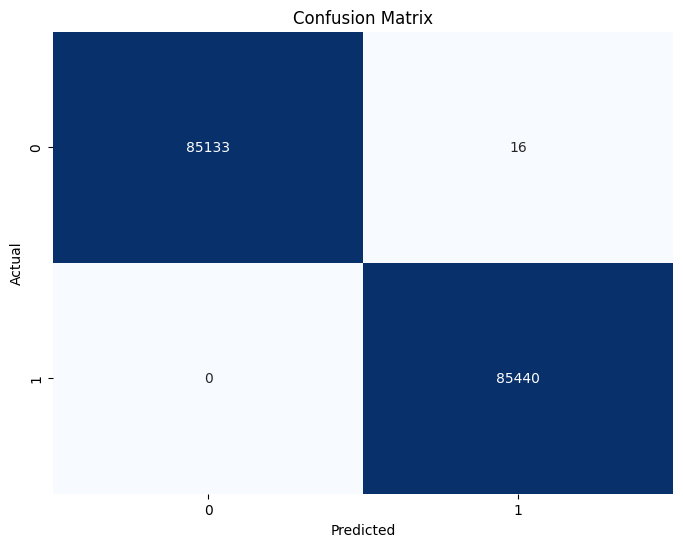

In [20]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Logistic Regression Model</strong></h1>
</div>

In [21]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results
[[83057  2092]
 [ 6671 78769]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>K-Nearest Neighbors (KNN) Model</strong></h1>
</div>

In [22]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Results")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Results
[[84958   191]
 [    0 85440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Decision Tree Model</strong></h1>
</div>

In [24]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Decision Tree Results")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Results
[[84887   262]
 [   88 85352]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Summary of Model Performance</strong></h1>
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


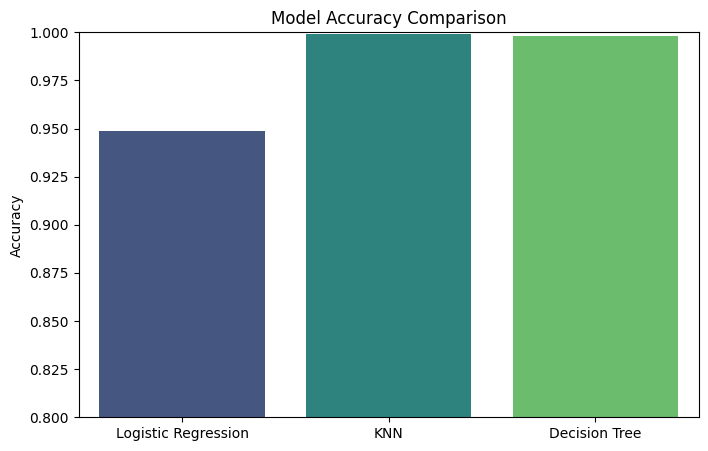

In [30]:
# Collect model performances
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracy = [
    log_model.score(X_test, y_test),
    knn_model.score(X_test, y_test),
    tree_model.score(X_test, y_test)
]

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 16px;"><strong>In this project, I developed a machine learning model to detect fraudulent credit card transactions using real-world transaction data. The process involved data preprocessing, normalization, and addressing class imbalance issues through techniques like oversampling. I applied logistic regression and random forest algorithms to classify fraudulent and legitimate transactions. The model's performance was evaluated using precision, recall, and F1-score metrics, ensuring effective fraud detection. Additionally, optimization strategies were explored to enhance model accuracy, making it a robust solution for fraud prevention in financial systems.</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->